# AI Python Zero-to-Hero
## Build a Customer Feedback Analyzer with DataLab

### **Introduction**

#### Dataset Overview:
- The `guest_data_with_reviews.xlsx` dataset contains customer feedback from a hospitality business.
- Key columns include:
  - `How likely are you to recommend us to a friend or colleague?` for Net Promoter Score (NPS) calculations.
  - `Review` for textual feedback, useful for sentiment analysis and topic modeling.

#### Key Concepts:
1. **Net Promoter Score (NPS):** Measures customer loyalty. Scores:
   - 9–10: Promoters
   - 7–8: Passives
   - 0–6: Detractors
   - Formula: NPS = percentage of promoters - percentage of detractors

2. **Sentiment Analysis:** Identifies the emotional tone (positive, negative, or neutral) in reviews using pre-trained AI models.

3. **Topic Modeling:** Uses embeddings to identify recurring themes in text data.

---



### **Workbook Activities**

#### 1. Exploratory Data Analysis (EDA)


In [5]:
# Import plotly and pandas
import pandas as pd
import plotly.express as px

In [6]:
# Read in the dataset "guest_data_with_reviews.xlsx" and show the first five rows

In [7]:
df=pd.read_excel("guest_data_with_reviews.xlsx")
df.head(5)
type(df)

pandas.core.frame.DataFrame

In [8]:
# What's the total length of the dataset?

In [9]:
df.shape
len(df)
df.columns


Index(['ID', 'Start time', 'Completion time', 'Email', 'Name', 'Full Name',
       'Gender', 'Date of Birth', 'Checkout Date', 'Purpose of the visit',
       'How did you discover us?', 'Rate your overall experience in our hotel',
       'How likely are you to recommend us to a friend or colleague?',
       'Staff attitude', 'Check-in Process', 'Room service',
       'Room cleanliness', 'Food quality', 'Variety of food', 'Broadband & TV',
       'Gym', 'Review'],
      dtype='object')

In [10]:
# How would you identify missing values in this dataset?

In [11]:
missing_values=df.isnull().sum()
missing_values


ID                                                                 0
Start time                                                      1108
Completion time                                                 1108
Email                                                           1108
Name                                                            1108
Full Name                                                          0
Gender                                                             0
Date of Birth                                                      0
Checkout Date                                                      0
Purpose of the visit                                               0
How did you discover us?                                           0
Rate your overall experience in our hotel                          0
How likely are you to recommend us to a friend or colleague?       0
Staff attitude                                                     0
Check-in Process                  

In [12]:
# How would you remove the missing values in this dataset?

In [13]:
df = df.dropna(axis=1)
df

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Review
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,it was an okay experience overall. the room wa...
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,the stay was memorable thanks to the poor staf...
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,while the staff were good and did their best t...
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,the hotel experience was average at best. the ...
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,"not my favorite stay, but the good staff helpe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1942,Guest 01942,Male,2006-09-17,2022-10-07,Vacation,hotel booking sites,3,8,Excellent,Very good,Good,Good,Very good,Average,Poor,i was pleasantly surprised by how excellent th...
1104,1945,Guest 01945,Male,1971-12-11,2021-05-12,Function,hotel booking sites,4,7,Poor,Average,Good,Very good,Good,Very good,Good,the hotel experience was average at best. the ...
1105,1946,Guest 01946,Male,1967-01-16,2020-09-10,Other,Word of mouth,4,3,Very good,Very good,Average,Poor,Good,Average,Good,this stay was a mix of good and bad. the staff...
1106,1947,Guest 01947,Male,2003-06-17,2022-11-17,Vacation,hotel booking sites,4,8,Good,Excellent,Good,Good,Poor,Average,Good,there’s room for improvement here. while the s...


In [14]:
# We're interested in the recommendation scores. What is their distribution? 

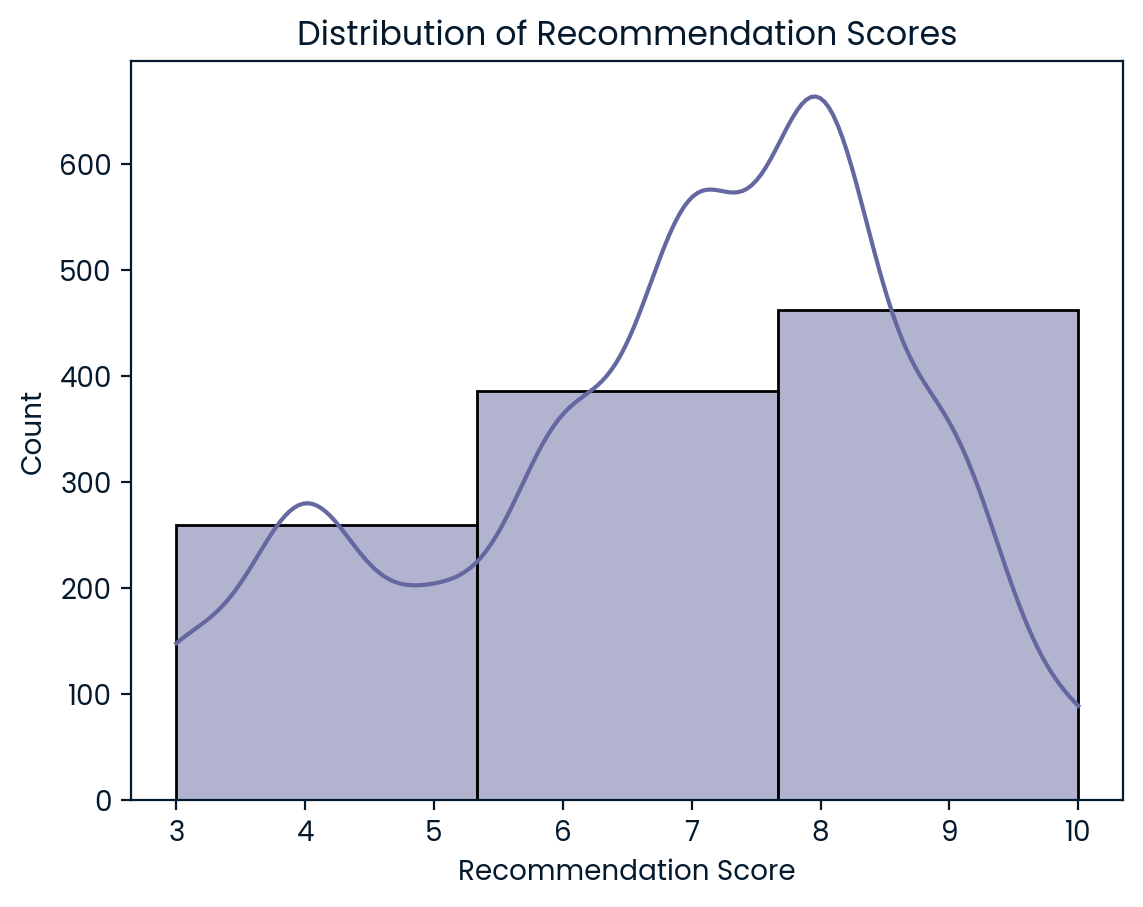

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["How likely are you to recommend us to a friend or colleague?"], bins=3, kde=True)
plt.title("Distribution of Recommendation Scores")
plt.xlabel("Recommendation Score")
plt.ylabel("Count")
plt.show()



#### 2. Calculate NPS

In [16]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)

In [17]:
df["NPS_category"]=pd.cut(df["How likely are you to recommend us to a friend or colleague?"],bins=[-1,6,8,10],labels=["detractors","passives","promoters"])
df.head()

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Review,NPS_category
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,it was an okay experience overall. the room wa...,promoters
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,the stay was memorable thanks to the poor staf...,detractors
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,while the staff were good and did their best t...,detractors
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,the hotel experience was average at best. the ...,detractors
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,"not my favorite stay, but the good staff helpe...",passives


In [18]:
# What proportion of customers are promoters, passives, and detractors?

In [19]:
nps_proportions=df["NPS_category"].value_counts(normalize=True)*100
nps_proportions


NPS_category
passives      47.202166
detractors    36.913357
promoters     15.884477
Name: proportion, dtype: float64

In [20]:
# Calculate the overall NPS and interpret its meaning

In [21]:
promoters=df[df["NPS_category"]=="promoters"].shape[0]
detractors=df[df["NPS_category"]=="detractors"].shape[0]
passives=df[df["NPS_category"]=="passives"].shape[0]
total_responses=df["NPS_category"].shape[0]
nps_score=((promoters-detractors)/total_responses)*100
if nps_score > 0:
    nps_interpretation = "positive"
elif nps_score < 0:
    nps_interpretation = "negative"
else:
    nps_interpretation = "neutral"
nps_score, nps_interpretation


(-21.028880866425993, 'negative')

In [22]:
# What does the NPS value indicate about customer loyalty?

In [23]:
if nps_score>50:
    loyality_interpretation="Excellent customer loyalty"
elif 0<nps_score<50:
    loyality_interpretation="Good customer loyalty"
elif -50<nps_score<0:
    loyality_interpretation="Poor customer loyalty"
else:
    loyality_interpretation="Very poor customer loyalty"
    
nps_score , nps_interpretation,loyality_interpretation
    
    

(-21.028880866425993, 'negative', 'Poor customer loyalty')

#### 3. Sentiment Analysis 

In [24]:
# Analyze sentiments in the reviews using a pre-trained model

In [31]:
# Now, import the necessary libraries and run the sentiment analysis
from transformers import pipeline
import pandas as pd


In [37]:
# Assuming df is already defined and contains a 'Review' column
sentiment_analyzer = pipeline("sentiment-analysis")
df["Sentiment"] = df["Review"].apply(lambda review: sentiment_analyzer(review)[0]["label"])
df[["Review", "Sentiment"]].head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,Review,Sentiment
0,it was an okay experience overall. the room wa...,POSITIVE
1,the stay was memorable thanks to the poor staf...,NEGATIVE
2,while the staff were good and did their best t...,NEGATIVE
3,the hotel experience was average at best. the ...,NEGATIVE
4,"not my favorite stay, but the good staff helpe...",POSITIVE


In [52]:
# Visualize sentiment distribution across the dataset

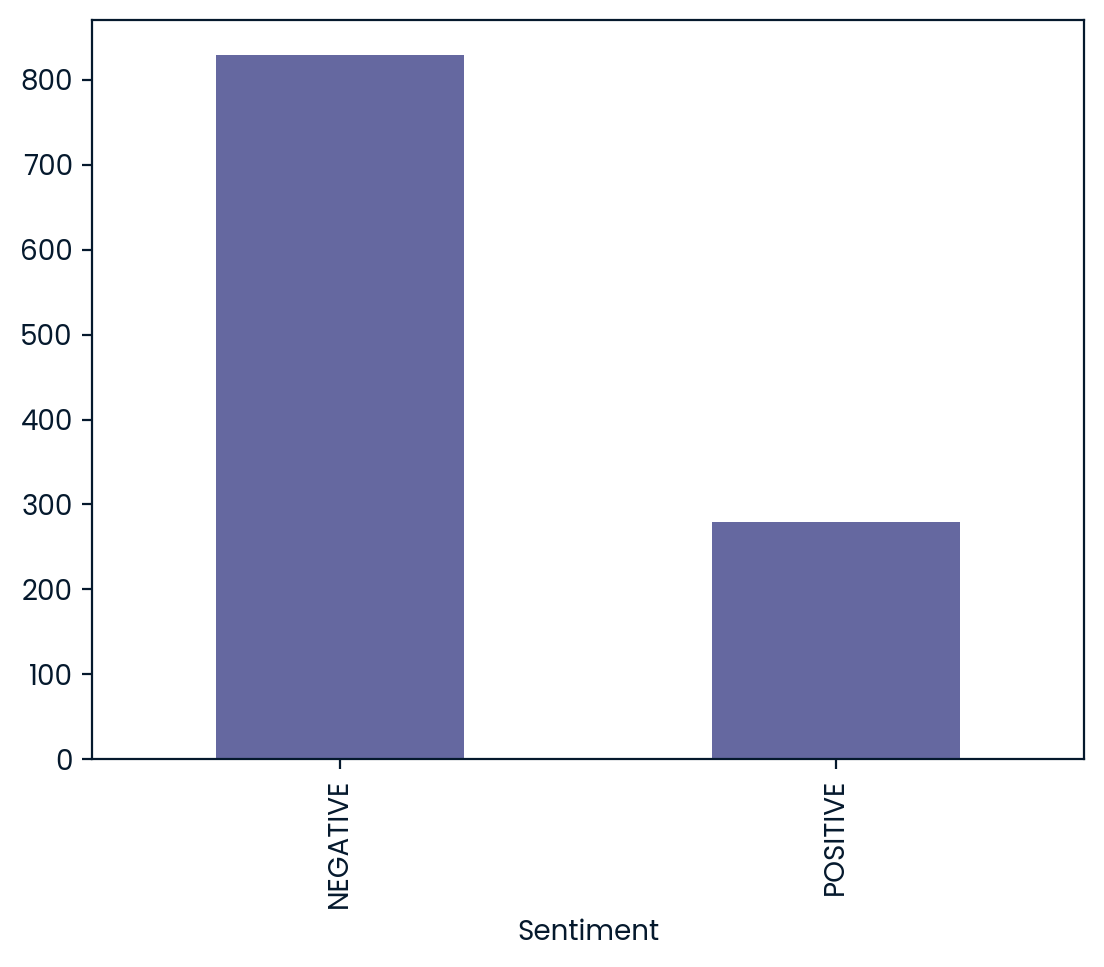

In [41]:
df["Sentiment"].value_counts().plot(kind="bar")
plt.xlabel="Sentiment"
plt.ylabel="Count"
plt.title="Sentiment Distribution"
plt.show()

In [53]:
# How would you interpret the sentiment distribution?

In [66]:
sentiment_counts=df["Sentiment"].value_counts().reset_index()
sentiment_counts.rename(columns={"count":"Count"},inplace=True)
sentiment_counts["Percentages"]=(sentiment_counts["Count"]/len(df))*100



,Sentiment,Count,Percentages
0,NEGATIVE,829,74.819495
1,POSITIVE,279,25.180505


#### 4. Topic Modeling

In [54]:
# What are some common keywords in the reviews?

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vectorizer=CountVectorizer(stop_words="english",max_features=20)
X=vectorizer.fit_transform(df["Review"])
word_counts=X.toarray().sum(axis=0)
vocab=vectorizer.get_feature_names_out()
keywords_df=pd.DataFrame({"Keyword":vocab,
                         "Count":word_counts}).sort_values(by="Count",ascending=False)
keywords_df

,Keyword,Count
14,room,1108
7,food,1003
8,good,997
15,staff,897
16,stay,457
6,experience,454
2,cleanliness,403
1,best,314
4,excellent,307
18,wasn,306


In [56]:
# Visualize results as a word cloud

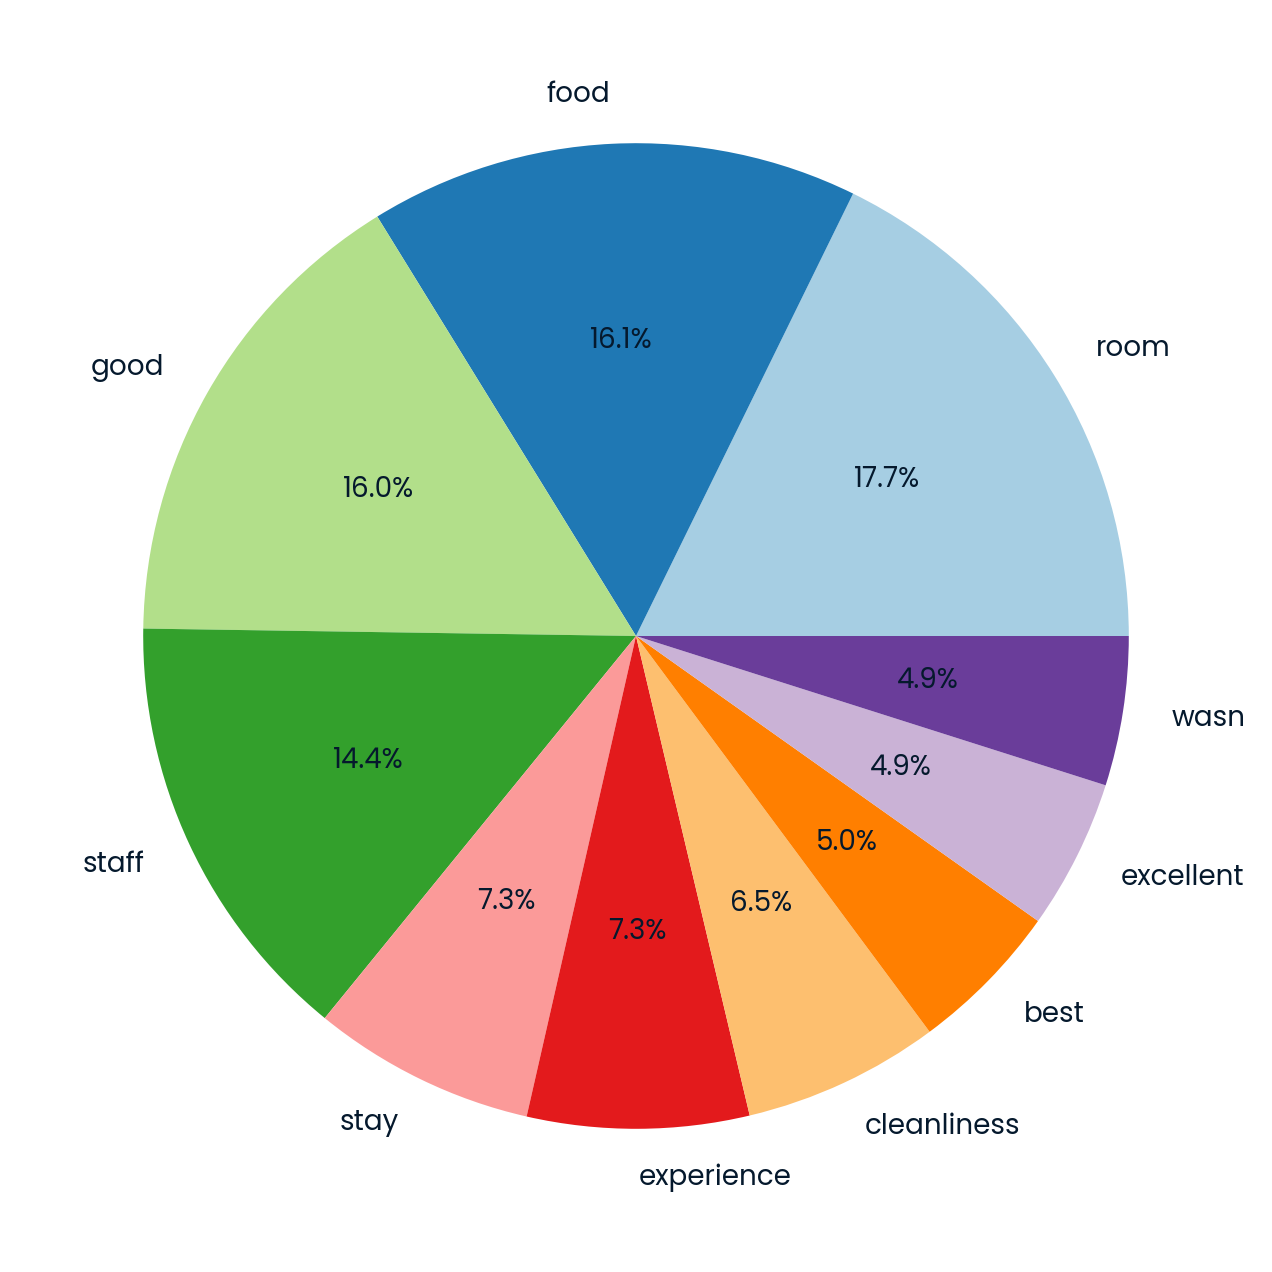

In [109]:
import matplotlib.pyplot as plt
top_keywords = keywords_df.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_keywords["Count"], labels=top_keywords["Keyword"], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.show()